In [0]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import keras
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Activation, Dense, Input, Dropout
from keras.layers import Conv2D, Flatten
from keras.models import Model
from keras import backend as K
import os, cv2
import tensorflow as tf
from keras import losses
from keras.optimizers import SGD,RMSprop,adam
from keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from IPython.display import clear_output
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
import keras 
import tensorflow as tf





In [49]:
dataset = pd.read_csv('Cleaned_Dataset.csv')
print(dataset.shape)
dataset.head()

(223, 10)


,0,5,1,4,0.1,2,5.1,3,2.1,4.1
0,0,3,1,4,0,0,0,3,2,4
1,1,2,0,0,3,0,2,0,0,9
2,1,3,1,0,4,0,2,0,0,2
3,1,2,1,0,2,0,2,0,0,0
4,1,4,1,0,4,0,2,0,0,2


In [50]:
from sklearn.preprocessing import normalize
FEATURES = dataset.columns[0:9]
X_data = dataset[FEATURES].as_matrix()
X_data = normalize(X_data)
print(X_data.shape)
PLACE = dataset.columns[9]
target = dataset[PLACE].as_matrix()
print(target.shape)
X_data,target = shuffle(X_data,target, random_state=2)

(223, 9)
(223,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [63]:
from sklearn.preprocessing import normalize
num_classes = 14
num_of_samples = X_data.shape[0]
label = np.zeros((num_of_samples,num_classes),dtype='int64')
print(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
for i in range(0,223):
    if target[i]== 0:
        label[i,0]= 1
    elif target[i] == 1:
        label[i,1] = 1
    elif target[i] == 2:
        label[i,2] = 1
    elif target[i] == 3:
        label[i,3] = 1
    elif target[i] == 4:
        label[i,4] = 1
    elif target[i] == 5:
        label[i,5] = 1
    elif target[i] == 6:
        label[i,6] = 1
    elif target[i] == 7:
        label[i,7] = 1
    elif target[i] == 8:
        label[i,8] = 1
    elif target[i] == 9:
        label[i,9] = 1
    elif target[i] == 10:
        label[i,10] = 1
    elif target[i] == 11:
        label[i,11] = 1
    elif target[i] == 12:
        label[i,12] = 1
    elif target[i] == 13:
        label[i,12] = 1
    else:
        label[i,13] = 1
Y = label
print(Y.shape)

(223, 14)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.1, random_state=1)
print(y_test[20])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [83]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(1024, activation = LeakyReLU(alpha=0.1), input_shape=(9, )))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation = LeakyReLU(alpha=0.1)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation = LeakyReLU(alpha=0.1)))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(14, activation = LeakyReLU(alpha=0.1)))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 1024)              10240     
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 14)                1806      
__________

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [0]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        plt.savefig('figure.png', dpi = 300)
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
        
plot_losses = PlotLosses()

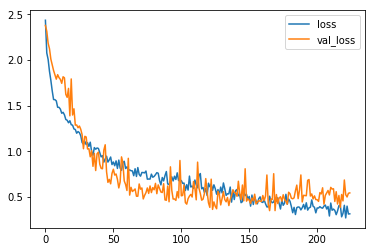

In [85]:
training_epochs = 225
# Need help on fixing the training. The losses aren't changing as the learning rate goes up. Really weird. 
# rmsprop = RMSprop(lr=1000, rho=0.9, epsilon=None, decay=0.1)
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=1, nb_epoch=training_epochs, verbose=1, validation_data=(X_test, y_test),  callbacks=[plot_losses],)

In [97]:
fname = 'RecModel_v1.h5'
model.save(fname,overwrite=True)

AttributeError: ignored

In [0]:
def calculate_accuracy(predicted, actual):
    total = len(predicted)
    count = 0
    for i in range (0, len(predicted)):
        indicator = True
        flag = True
        for k in range(0,13):
            if predicted[i,k] != actual [i,k]:
                flag = False
            if flag == False:
                indicator = False
            flag = True 
        if indicator != False:
            count+=1
        indicator = True
    return count / total *100

In [89]:
#The person we wish to check. 
test_subject = 5
test_value = X_train [test_subject-1:test_subject, :]
result = model.predict(test_value)
print(result)
num = np.argmax(result)
real = np.argmax(y_test[test_subject-1:test_subject, :])
print(y_test[test_subject-1:test_subject, :])

[[1.1887322e-02 1.9252236e-06 9.8707855e-01 5.4458542e-07 9.7242364e-06
  2.8218603e-05 1.0971351e-06 9.9500051e-07 9.7084889e-04 1.6829075e-05
  9.8827456e-07 7.1445197e-07 1.1977950e-06 1.1204409e-06]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [87]:
print( "The accuracy is [in percent]: ")
print(calculate_accuracy(model.predict(X_train), y_train))

The accuracy is [in percent]: 
0.0


In [90]:
print("Model Prediction")
if num ==0:
    print("Predicted: American Express Cobalt")
elif num ==1:
    print("Predicted: American Express Essential")
elif num ==2:
    print("Predicted: American Express Marriot Bonvoy")
elif num ==3:
    print("Predicted: American Express Simply Cash")
elif num ==4:
    print("Predicted: American Express Simply Cash Preferred")
elif num ==5:
    print("Predicted: Meridian Visa Infinite")
elif num ==6:
    print("Predicted: PC Financial Mastercard")
elif num ==7:
    print("Predicted: Scotiabank Momentum No-Fee Visa")
elif num ==8:
    print("Predicted: Scotiabank Momentum Visa Infinite")
elif num ==9:
    print("Predicted: Scotiabank SCENE Visa")
elif num ==10:
    print("Predicted: True Line Gold Mastercard")
elif num ==11:
    print("Predicted: True Line Mastercard")
elif num ==12:
    print("Predicted: American Express Blue Sky")
elif num ==13:
    print("Predicted: Not Enough")

print()
    
print("Ground Truth: ")
num = real
if num ==0:
    print("Predicted: American Express Cobalt")
elif num ==1:
    print("Predicted: American Express Essential")
elif num ==2:
    print("Predicted: American Express Marriot Bonvoy")
elif num ==3:
    print("Predicted: American Express Simply Cash")
elif num ==4:
    print("Predicted: American Express Simply Cash Preferred")
elif num ==5:
    print("Predicted: Meridian Visa Infinite")
elif num ==6:
    print("Predicted: PC Financial Mastercard")
elif num ==7:
    print("Predicted: Scotiabank Momentum No-Fee Visa")
elif num ==8:
    print("Predicted: Scotiabank Momentum Visa Infinite")
elif num ==9:
    print("Predicted: Scotiabank SCENE Visa")
elif num ==10:
    print("Predicted: True Line Gold Mastercard")
elif num ==11:
    print("Predicted: True Line Mastercard")
elif num ==12:
    print("Predicted: American Express Blue Sky")
elif num ==13:
    print("Predicted: Not Enough")

Model Prediction
Predicted: American Express Marriot Bonvoy

Ground Truth: 
Predicted: American Express Marriot Bonvoy
